In [1]:
import IPython.display as ipd
import IPython.display as ipd 
import io
import os
import pandas as pd
import glob 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import pyaudio as pyaudio
import librosa
import speech_recognition as sr
import librosa.display
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from pydub import AudioSegment
import openpyxl

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2022-10-24 21:50:47.933207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 21:50:48.499098: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-24 21:50:48.507601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic 

In [2]:
np.set_printoptions(suppress=True)

In [3]:
#Se crea un lista de tuplas con informacion de los audios
dir = 'dataset_audios'
contenido = os.listdir(dir)
nombres_audi=[]
for fichero in contenido:
    if os.path.isfile(os.path.join(dir, fichero)) and fichero.endswith('.m4a'):
          cant="Kevyn"
          nombres_audi.append((fichero,cant))
          
          
    if os.path.isfile(os.path.join('dataset_audios/dataset_otros/',fichero)) and fichero.endswith('.m4a'):
          cant="otros"
          nombres_audi.append((fichero,cant))

print(nombres_audi)


[('Recording (123).m4a', 'Kevyn'), ('Recording (123).m4a', 'otros'), ('Recording (97).m4a', 'Kevyn'), ('Recording (97).m4a', 'otros'), ('Recording (91).m4a', 'Kevyn'), ('Recording (91).m4a', 'otros'), ('Recording (41).m4a', 'Kevyn'), ('Recording (21).m4a', 'Kevyn'), ('Recording (134).m4a', 'Kevyn'), ('Recording (134).m4a', 'otros'), ('Recording (26).m4a', 'Kevyn'), ('Recording (12) - copia.m4a', 'Kevyn'), ('Recording (7) - copia.m4a', 'Kevyn'), ('Recording (36).m4a', 'Kevyn'), ('Recording (30).m4a', 'Kevyn'), ('Recording (83).m4a', 'Kevyn'), ('Recording (83).m4a', 'otros'), ('Recording (45).m4a', 'Kevyn'), ('Recording (180).m4a', 'Kevyn'), ('Recording (180).m4a', 'otros'), ('Recording (21) - copia.m4a', 'Kevyn'), ('Recording (27).m4a', 'Kevyn'), ('Recording (115).m4a', 'Kevyn'), ('Recording (115).m4a', 'otros'), ('Recording (111).m4a', 'Kevyn'), ('Recording (111).m4a', 'otros'), ('Recording (47).m4a', 'Kevyn'), ('Recording (63).m4a', 'Kevyn'), ('Recording - copia.m4a', 'Kevyn'), ('Reco

In [4]:
wb = openpyxl.Workbook()
hoja = wb.active
# Crea la fila del encabezado con los títulos
hoja.append(('id', 'persona'))
for registro in nombres_audi:
    # producto es una tupla con los valores de un producto 
    hoja.append(registro)


In [5]:
wb.save('dataset.xlsx')

In [6]:
###-Cargamos el archivo de datos de los audios
df=pd.read_excel("dataset.xlsx")
df

,id,persona
0,Recording (123).m4a,Kevyn
1,Recording (123).m4a,otros
2,Recording (97).m4a,Kevyn
3,Recording (97).m4a,otros
4,Recording (91).m4a,Kevyn
...,...,...
306,nuevo.m4a,Kevyn
307,nuevo.m4a,otros
308,Recording (66).m4a,Kevyn
309,Recording (16).m4a,Kevyn


Class:  Kevyn


/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


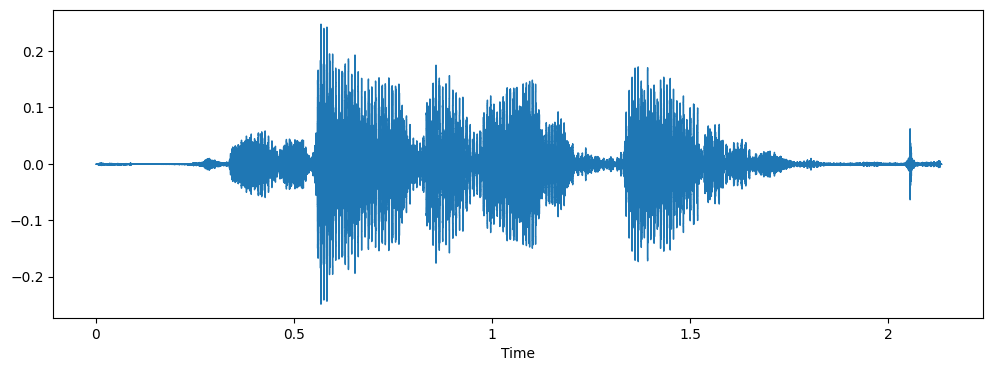

In [7]:

##--dirección raiz
data_dir=('/home/kevyn/Downloads/Proyecto/')  

##--crea una variable con el valor aleatorio de la muestra del tamaño del indice del df
i = random.choice(df.index)

##--toma el ID de la fila seleccionada en el [i]
audio_name = df.id[i]
if df.persona[i]=='Kevyn':

    ##--crea la ruta donde se encuentra el audio
    path = os.path.join(data_dir, 'dataset_audios/', str(audio_name) + '.m4a')

    ##--imprime el nombre de la persona a quien le pertenece el audio
    print('Class: ', df.persona[i])

    ##--carga el archivo en un formato serie de tiempo [x] y almacena el sample rate en [sr]
    x, sr = librosa.load(data_dir+'dataset_audios/'+ str(df.id[i]))

else:
    
    ##--crea la ruta donde se encuentra el audio
    path = os.path.join(data_dir, 'dataset_audios/dataset_otros/', str(audio_name) + '.m4a')

    ##--imprime el nombre de la persona a quien le pertenece el audio
    print('Class: ', df.persona[i])

    ##--carga el archivo en un formato serie de tiempo [x] y almacena el sample rate en [sr]
    x, sr = librosa.load(data_dir+'dataset_audios/dataset_otros/'+ str(df.id[i]))

##--imprime la serie de tiempo en un grafico de amplitud de honda
plt.figure(figsize=(12, 4))

librosa.display.waveshow(x, sr=sr)

In [8]:
##--Creamos una funcion para extraer las mediciones del audio.
def extract_features(files): 

    # Establece el nombre de la ruta a donde están los archivos de audio en mi computadora

    if files.persona=='Kevyn':
      file_name = os.path.join(os.path.abspath(data_dir)+'/dataset_audios/'+str(files.id))
    else:
      file_name = os.path.join(os.path.abspath(data_dir)+'/dataset_audios/dataset_otros/'+str(files.id))
     

    # Carga el archivo de audio como una serie de tiempo de coma flotante y asigna la frecuencia de muestreo predeterminada
    # Sample rate is set to 22050 by default
    # la serie de tiempo esta almacenada en [X]
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # genera Mel-frequency cepstral coefficients (MFCCs) de la serie de tiempo
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Genera una transformada de Fourier a corto plazo (STFT) para usar en chroma_stft

    stft = np.abs(librosa.stft(X))

    # Calcula un cromagrama a partir de una forma de onda o espectrograma de potencia.

    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # calcula un espectograma de mel-scaled 

    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Calcula el contraste espectral

    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Calcula las características del centroide tonal (tonnetz)

    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)

    # Agregamos también las clases de cada archivo como una etiqueta al final

    label = files.persona

    # Pedimos que nos devuelva todos los indicadores mas el target

    return mfccs, chroma, mel, contrast, tonnetz,label

In [9]:
##--Obtenemos las caracteristicas de cada audio y medimos el tiempo de demora de la consulta

startTime = datetime.now()
features_label = df.apply(extract_features, axis=1)

print(datetime.now() - startTime)

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/tmp/ipykernel_14657/2216690126.py:30: FutureWarning: Pass y=[ 0.00000108 -0.00000243 -0.00000358 ...  0.00000716 -0.00000414
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_14657/2216690126.py:30: FutureWarning: Pass y=[-0.00000412 -0.0000162  -0.0000241  ...  0.00004819  0.00003481
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=537
  return f(*args, **kwargs)
/tmp/ipykernel_14657/2216690126.py:30: FutureWarnin

0:01:36.551664


/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=846
  return f(*args, **kwargs)


In [10]:
features_label

0      ([-452.01035, 115.88336, -4.4637475, 18.998716...
1      ([-383.45142, 141.61842, -8.464875, 10.679446,...
2      ([-371.72952, 137.25383, -11.378886, 18.193928...
3      ([-431.1905, 118.48764, -2.826282, 15.990895, ...
4      ([-454.43378, 137.53192, -20.309015, 21.275854...
                             ...                        
306    ([-506.94986, 122.15298, 18.078526, 7.02907, 1...
307    ([-506.94986, 122.15298, 18.078526, 7.02907, 1...
308    ([-472.42725, 129.12326, 9.444537, 23.467218, ...
309    ([-418.0432, 114.71335, 5.5749407, 18.228374, ...
310    ([-422.65198, 138.76898, -10.543213, 14.662524...
Length: 311, dtype: object

In [11]:
#De la lista generada construimos un array de datos, el cual ingresará a nuestra red neronal

features = []

for i in range(0, len(features_label)):

    features.append(np.concatenate((features_label[i][0], features_label[i][1], 

                features_label[i][2], features_label[i][3],

                features_label[i][4]), axis=0))



##--El largo del archivo debe ser igual al del df y de los labels

print(len(df))
print(len(features))
labels = df.persona

print(len(labels))

311
311
311


In [12]:
##-.revisamos un array de las personas unicas dentro de labels

np.unique(labels, return_counts=True)

(array(['Kevyn', 'otros'], dtype=object), array([206, 105]))

In [13]:
##--separamos los valores X y los valores Y
X = np.array(features)
y = np.array(labels)

# recodificamos el valor Y a un tipo categórico
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y),2)

#revisamos los tamaños de los arrays de X e Y: (a:b); a representa total de filas y b total de columnas

print(X.shape)

print(y.shape)

(311, 193)
(311, 2)


In [14]:
X_train = X[40:162]
y_train = y[40:162]
X_val = X[162:]
y_val = y[162:]
X_test = X[:40]
y_test = y[:40]

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)

print(y_test.shape)

(122, 193)
(122, 2)
(149, 193)
(149, 2)
(40, 193)
(40, 2)


In [15]:
#--normlizacion<<<<<<<----esta aplique.
X_train =preprocessing.normalize(X_train,norm='l2')
X_val = preprocessing.normalize(X_val,norm='l2')
X_test = preprocessing.normalize(X_test,norm='l2')

print(X_train.shape)
print(X_val.shape)

print(X_test.shape)

(122, 193)
(149, 193)
(40, 193)


In [16]:
##--construimos el modelo CNN
model = Sequential()
model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    
model.add(Dense(2, activation = 'softmax'))##<-- numero de categorias a predecir
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

2022-10-24 21:52:42.492700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-24 21:52:42.492728: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-24 21:52:42.492749: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kevyn): /proc/driver/nvidia/version does not exist
2022-10-24 21:52:42.493082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
##--revisamos su notación


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 193)               37442     
                                                                 
 dropout (Dropout)           (None, 193)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               24832     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [18]:
history = model.fit(X_train, y_train, batch_size=256, epochs=100,validation_data=(X_val, y_val)) ##,callbacks=[early_stop)

Epoch 1/100
1/1 [==============================] - 1s 644ms/step - loss: 0.6864 - accuracy: 0.5902 - val_loss: 0.6755 - val_accuracy: 0.6376
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6738 - accuracy: 0.6885 - val_loss: 0.6685 - val_accuracy: 0.6376
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6551 - accuracy: 0.6803 - val_loss: 0.6624 - val_accuracy: 0.6376
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6464 - accuracy: 0.6803 - val_loss: 0.6576 - val_accuracy: 0.6376
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 0.6373 - accuracy: 0.6803 - val_loss: 0.6539 - val_accuracy: 0.6376
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6456 - accuracy: 0.6803 - val_loss: 0.6519 - val_accuracy: 0.6376
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6258 - accuracy: 0.6803 - val_loss: 0.6517 - val_accuracy: 0.6376
Epoch 8/100
1/1 [==

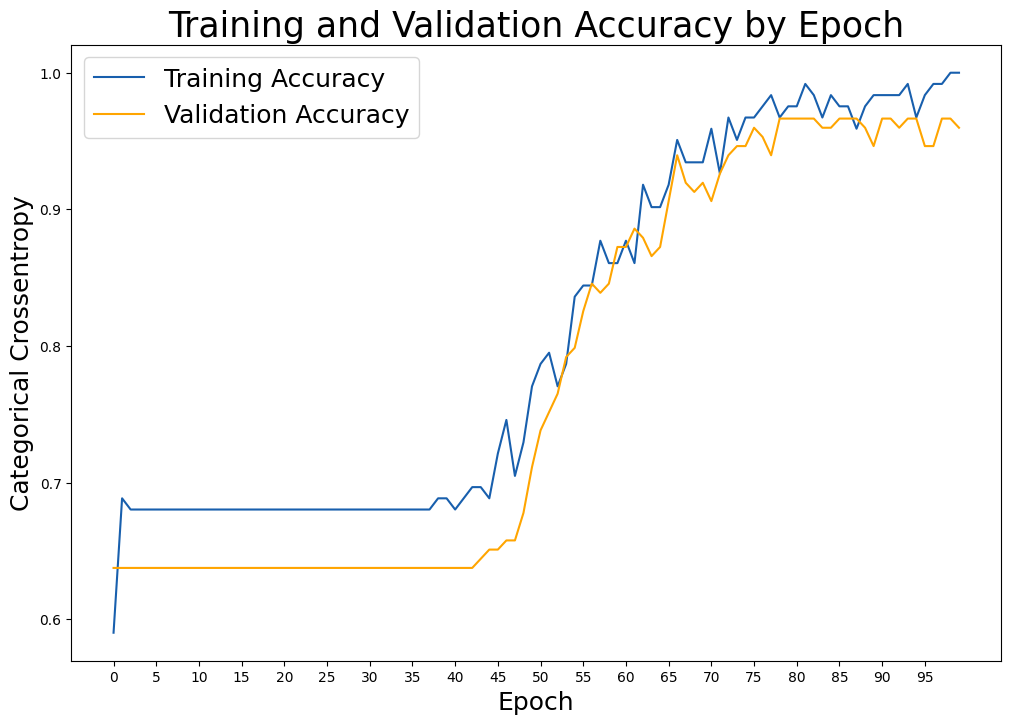

In [19]:
# Consulte la precisión de nuestro tren y la precisión de validación durante épocas.

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Establecer el tamaño de la figura.
plt.figure(figsize=(12, 8))

# Genere un diagrama lineal de entrenamiento, probando la pérdida en épocas.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Establecer título
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [20]:
# Obtenemos nuestras predicciones de los datos de prueba

preds=model.predict(X_test) 
classes_x=np.argmax(preds,axis=1)
# # Transformamos nuestras predicciones a los ID..
preds = lb.inverse_transform(classes_x)
# Cortamos nuestro marco de datos a nuestro marco de datos de prueba

df_test = df[:40]
#Creamos una nueva columna llamada preds

df_test['preds'] = preds
##--comparamos los resultados de persona vs la preds.

df_test

2/2 [==============================] - 0s 7ms/step


/tmp/ipykernel_14657/2304243598.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds'] = preds


,id,persona,preds
0,Recording (123).m4a,Kevyn,Kevyn
1,Recording (123).m4a,otros,otros
2,Recording (97).m4a,Kevyn,Kevyn
3,Recording (97).m4a,otros,otros
4,Recording (91).m4a,Kevyn,Kevyn
5,Recording (91).m4a,otros,otros
6,Recording (41).m4a,Kevyn,Kevyn
7,Recording (21).m4a,Kevyn,Kevyn
8,Recording (134).m4a,Kevyn,Kevyn
9,Recording (134).m4a,otros,otros


In [21]:
##------Captura de voz:

#Cargamos la libreria que transforma el audio a texto
import speech_recognition as sr
r=sr.Recognizer()

with sr.Microphone() as source:

    print('Menciona tu numero de DNI....')

    nuevo= r.listen(source)

    print('realizado')



    try:

        voice=r.recognize_google(nuevo, language='Co')

        print(voice)

    except Exception as e:

        print(e)

Menciona tu numero de DNI....


ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.front
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround21
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround21
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround40
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround41
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround50
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround51
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround71
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.iec958
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.iec958
ALSA lib pcm.c:2642:(snd

realizado
what is yours is going to ask Alexa


In [22]:
with open('dataset_audios/dataset_otros/nuevo.m4a', "wb") as f:
    f.write(nuevo.get_wav_data())

In [23]:
audio=r'dataset_audios/dataset_otros/nuevo.m4a'
##--Cargamos y probamos el archivo de audio

ipd.Audio(audio, rate=22050) 

In [24]:
##--tenemos que simular el mismo pre procesamiento para este audio.
data= pd.DataFrame(columns=('id', 'genero', 'persona'))

data.loc[len(data)]=['nuevo.m4a',0,'nuevo'] 
nuevo = data.apply(extract_features, axis=1)

features_new = []

for i in range(0, len(nuevo)):

    features_new.append(np.concatenate((nuevo[i][0], nuevo[i][1], 

                nuevo[i][2], nuevo[i][3],

                nuevo[i][4]), axis=0))

##--separamos los valores X y los valores Y

Xnuevo = np.array(features_new)
X_Xnuevo=preprocessing.normalize(Xnuevo,norm='l2')

/tmp/ipykernel_14657/2216690126.py:30: FutureWarning: Pass y=[ 0.00027254  0.0003742   0.00035328 ... -0.0000418   0.0000773
 -0.00000862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [25]:
###--obtener la prediccion con la data el audio nuevo grabado


preds=model.predict(X_Xnuevo) 
classes_x=np.argmax(preds,axis=1)
# # Transformamos nuestras predicciones a los ID..

preds = lb.inverse_transform(classes_x)

if preds[0]=='Kevyn':
    print(1)
else:
    print(0)

1/1 [==============================] - 0s 24ms/step
1


In [26]:
print(preds)

['Kevyn']


In [ ]:
import serial, time

def savebox(port,preds):
  a = 0 
  ser = serial.Serial(port,9600)
  
  time.sleep(2)
  while a==0:
    
      
    if preds[0] == 'Kevyn':
      ser.write(b'A')
      print("Usuario reconocido")
      print(preds)
    else:
      ser.write(b'B')
      print("Usuario desconocido")
      print(preds)

    print("A")
    print('presiona 0 para una nueva grabacion')
    a = int(input())


savebox('/dev/ttyACM1',preds)


In [ ]:
import serial, time
arduino = serial.Serial("COM7", 9600)
time.sleep(2)
arduino.write(b'9')
arduino.write(b'9')
arduino.write(b'9')
arduino.write(b'9')
arduino.close()